<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/KMeansFrom_Scrath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
#data set source https://github.com/FazlyRabbiBD/Data-Science-Book/blob/master/data-income-age-group.csv

In [5]:
df = pd.read_csv("/content/drive/MyDrive/data-income-age-group.csv")

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df.shape

(22, 3)

In [8]:
%matplotlib inline

Text(0, 0.5, 'Income($)')

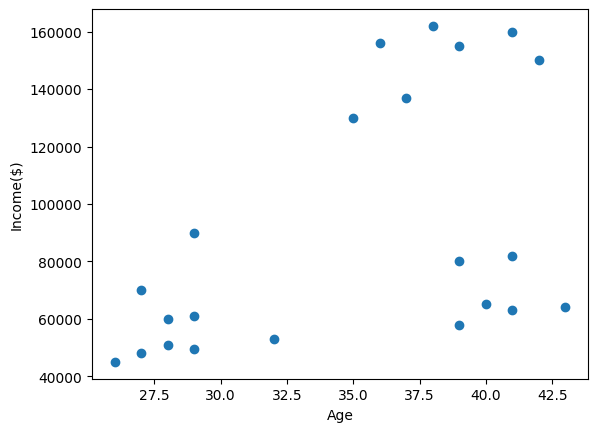

In [9]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

Ideally we would use some thing like Elbow method to find the ideal number of clusters. In this case as we are implementing clustering from scartch we visually see that 3 distinct clusters are easily possible, so we'l set the number of clusters to be formed as 3

In [10]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [17]:
def kmeans(X, k, max_iters=100, tol=0.0001):
    np.random.seed(52)
    n_samples, n_features = X.shape
    # Initialize centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Assign points to the nearest centroid
        clusters = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids

    return clusters, centroids


In [18]:
cluster_labels, cluster_centers = kmeans(df[['Age','Income($)']].to_numpy(), 3)

In [19]:
import matplotlib.pyplot as plt

def plot_clusters(X, cluster_labels, centroids):
    """
    Plot the clusters with different colors and their centroids.

    :param X: ndarray, shape (n_samples, n_features)
        The input data.
    :param cluster_labels: ndarray, shape (n_samples,)
        The cluster labels for each point.
    :param centroids: ndarray, shape (k, n_features)
        The cluster centroids.
    """
    k = len(centroids)
    plt.figure(figsize=(8, 6))

    # Plot each cluster
    for i in range(k):
        points = X[cluster_labels == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='x', label='Centroids')

    plt.title('K-means Clustering')
    plt.xlabel('Age')
    plt.ylabel('Income ($)')
    plt.legend()
    plt.show()

# Example usage
# Assuming you have already run the kmeans function and have the data, cluster_labels, and cluster_centers
# plot_clusters(data, cluster_labels, cluster_centers)


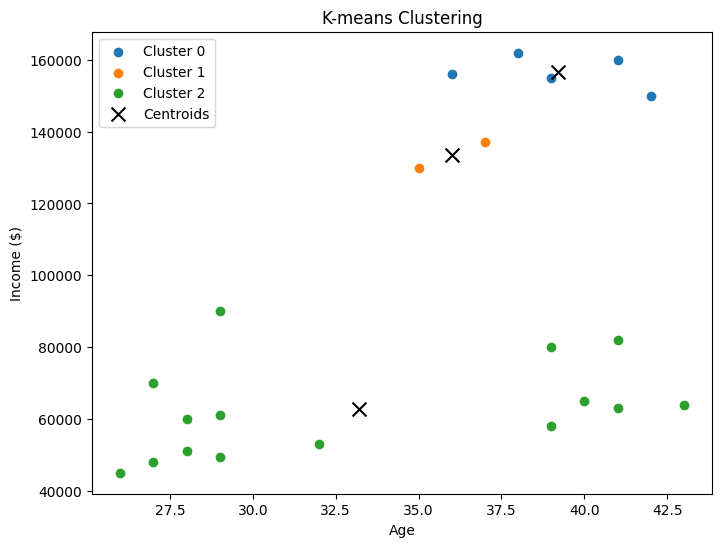

In [20]:
plot_clusters(df[['Age','Income($)']].to_numpy(), cluster_labels, cluster_centers)